This is only for teaching concepts - it is NOT an investment tool!!!!


In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 608.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [2]:
import yfinance as yf

data = yf.download("OPBK", start="2019-01-01")


[*********************100%***********************]  1 of 1 completed


In [3]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-09,11.48,11.55,11.37,11.51,11.51,7200
2023-02-10,11.54,11.59,11.51,11.56,11.56,19000
2023-02-13,11.61,11.61,11.52,11.57,11.57,28400
2023-02-14,11.58,11.63,11.53,11.53,11.53,13000
2023-02-15,11.56,11.60,11.52,11.52,11.52,19800


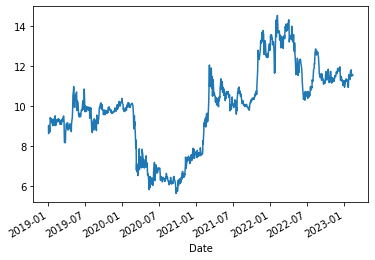

In [4]:
data['Close'].plot()

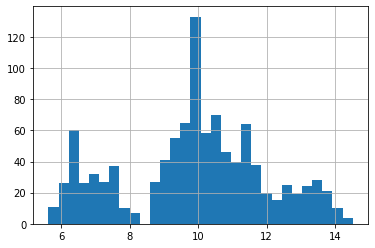

In [5]:
data['Close'].hist(bins=30)

In [6]:
 a = data['Close'][-1]

In [7]:
data['Daily'] = data['Close'] - data['Open']

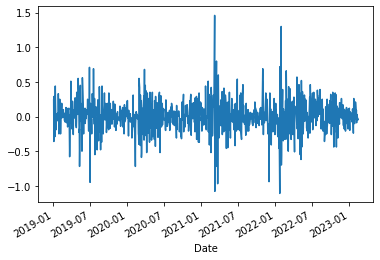

In [8]:
data['Daily'].plot()

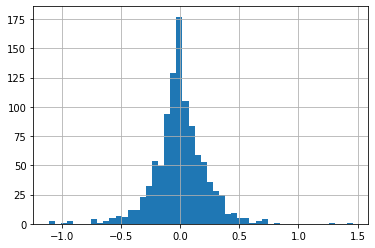

In [9]:
data['Daily'].hist(bins=50)

In [10]:
print('Average daily move:', data['Daily'].mean())
print('Average daily Std Dev:', data['Daily'].std())

Average daily move: -0.0014148194475513565
Average daily Std Dev: 0.22458786395940972


In [11]:
x = data['Daily'].mean()
y = data['Daily'].std()
z = data['Daily']

In [12]:
print('we are 68% confident the share price range:')
print('Lower: ', a + (x - y))
print('Upper: ', a + (x + y))

we are 68% confident the share price range:
Lower:  11.293997774356711
Upper:  11.74317350227553


In [13]:
print('we are 95% confident the share price range:')
print('Lower: ', a + (x - 1.96*y))
print('Upper: ', a + (x + 1.96*y))

we are 95% confident the share price range:
Lower:  11.078393424955678
Upper:  11.958777851676563


But is our data normally distributed?

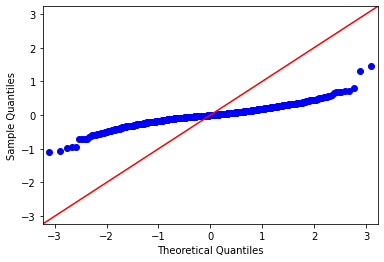

In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(z, line='45')

plt.show()

**qq-plots**

https://www.statology.org/q-q-plot-normality/

In [15]:
from scipy.stats import shapiro
shapiro(z)

ShapiroResult(statistic=0.9442413449287415, pvalue=2.4073176288249927e-19)

**Shapiro-Wilkes Test**

Null: Not Normal
Alt: Normal

if the p-value < alpha, then we do not have enough evidence to reject the null.

https://www.statology.org/shapiro-wilk-test-python/

In [20]:
from scipy.stats import kurtosis
from scipy.stats import skew

print('Kurtosis:',kurtosis(z, axis=0, bias=True))
print('Skew', skew(z, axis=0, bias=True))

Kurtosis: 4.902792245543226
Skew 0.07190260415836751


**Skewness and Kurtosis**

https://www.statology.org/how-to-report-skewness-kurtosis/
